# Assignment: Enhancing a Keras Sequential Model for CIFAR-10 Classification

## Objective

The purpose of this assignment is to familiarize you with basic techniques in building
and refining neural network models using Keras. You will work with a Convolutional
Neural Network (CNN) designed for the CIFAR-10 image classification task. By
completing this assignment, you will gain hands-on experience in modifying network
architectures, understanding model summaries, and optimizing training parameters
based on validation performance.

## Background

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes,
with 6,000 images per class. It is widely used for training machine learning and
computer vision algorithms.
A basic Keras Sequential model for CIFAR-10 classification typically includes
convolutional layers, pooling layers, and dense (fully connected) layers. Enhancing this
model involves adding more complexity to improve its performance.

## Task 1: Add an Additional Convolutional and Max Pooling Layer

1. Objective: Enhance the existing CNN model by adding another convolutional layer with 64 filters followed by a (2, 2) max pooling layer.
2. Instructions:
   - Begin with the provided basic Keras Sequential model for CIFAR-10
classification.
   - Add a Conv2D layer with 64 filters, a kernel size of (3, 3), activation
function "relu", and appropriate input shape if necessary.
   - Following the convolutional layer, add a MaxPooling2D layer with a pool
size of (2, 2).
   - Ensure that the added layers are correctly placed within the model
architecture to maintain the flow of data through the network.
3. Starter Code:

In [56]:
# Added to install tf
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [57]:
# Imported `import tensorflow as tf`, but did not use it - so I removed it
# Installing all the keras stuff manually is weird.
# It's more typical to use `tf.keras` whenever and wherever like Shakira.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Initialize the sequential model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer ~~(to be added)~~
model.add(Conv2D(64, (3, 3), activation='relu'))
# Why should there be a MaxPooling after this like asked for in the assignment?
# The tensorflow.org example didn't have a MaxPooling2D before the dense layers.
# Wouldn't this cause over-compression of information passed to the dense layers???
model.add(MaxPooling2D((2, 2)))

# I redacted the following two thoughts:
"""
Third convolutional layer
Using just 2 Conv2D layers is not enough to capture the complexity of the CIFAR-10 dataset
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
"""

"""
To make up for the MaxPooling2D in the second layer, I added another Conv2D layer
With just conv2d -> max_pooling2d -> conv2d (-> max_pooling2d) you only get like 10% across metrics
Why were the additional convolution base patterns get removed?
The cnn.ipynb had 3, but this one only had 1 with an additional one added?
model.add(Conv2D(64, (3, 3), activation='relu'))
"""

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))


# Using "sparse_categorical_crossentropy" with the default `from_logits=False` threw me for a loop after reading the tensorflow.org example
# From my understanding `activation="softmax"` + `from_logits=False` will will convert the logits to probabilities before calculating the loss. This means (from Chatgipity):
#  - When to use logits: This is recommended for training to avoid numerical issues and improve stability.
#  - When to use softmax directly: It’s more common in inference/prediction scenarios, where you want probabilities to interpret class confidence levels directly.
# We should use `activation="linear"` and `from_logits=True` since we are not using the probabilities for anything else???

# Compile the model
model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])


## Task 2: Output the Model Summary

1. Objective: Understand the structure and parameters of the enhanced model by viewing its summary.
2. Instructions:
   - After adding the new convolutional and pooling layers, output the model summary.
   - The summary should display each layer"s type, output shape, and the number of parameters.
   - Analyze the summary to ensure that the added layers are correctly integrated into the model.
3. Starter Code: [...]
4. Expected Output: The summary should list all layers, including the newly added
convolutional and pooling layers, along with their respective output shapes and
parameter counts. Ensure that the total number of parameters has increased
appropriately.

In [58]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Find the Optimal Number of Epochs Based on Validation Accuracy

1. Objective: Determine the optimal number of training epochs that maximize
validation accuracy without causing overfitting.
2. Instructions:
   - Train the enhanced model using the CIFAR-10 dataset.
   - Use a portion of the training data as a validation set to monitor the model's
performance on unseen data.
   - Implement Early Stopping to halt training when the validation accuracy
stops improving.
   - Record the number of epochs after which the validation accuracy
plateaus.
   - Plot the training and validation accuracy over epochs to visualize the
model's performance.
3. Starter Code:

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.3505 - loss: 1.7684 - val_accuracy: 0.5388 - val_loss: 1.2968
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.5713 - loss: 1.2200 - val_accuracy: 0.6178 - val_loss: 1.1009
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.6403 - loss: 1.0250 - val_accuracy: 0.6353 - val_loss: 1.0437
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6795 - loss: 0.9264 - val_accuracy: 0.6626 - val_loss: 1.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7038 - loss: 0.8490 - val_accuracy: 0.6807 - val_loss: 0.9240
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7267 - loss: 0.7748 - val_accuracy: 0.6808 - val_loss: 0.9413
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7458 - loss: 0.7232 - val_accuracy: 0.6751 - val_loss: 0.9726
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7654 -

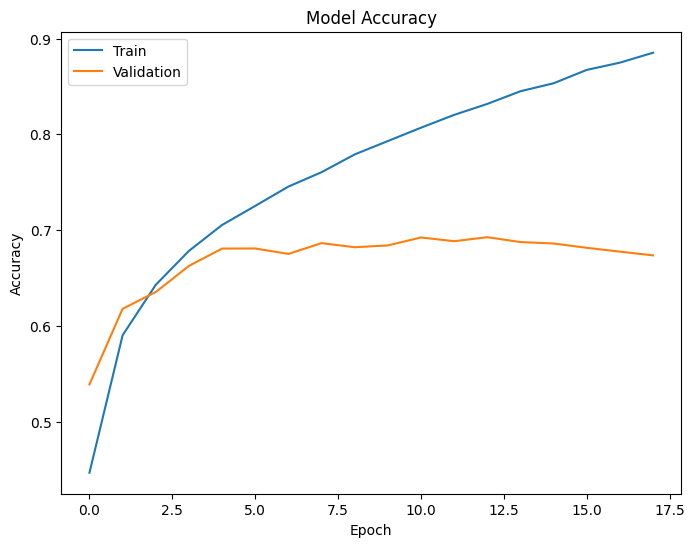

Optimal number of epochs: 18


In [59]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Early Stopping callback
early_stop = EarlyStopping(
    monitor="val_accuracy",
    # This seems too patient
    patience=5,
    restore_best_weights=True,
)

# Train the model
history = model.fit(x_train, y_train, epochs=50,
    validation_split=0.2,
    # Early stopping is a good call to prevent overfitting. Improvement over tensorflow.org example
    callbacks=[early_stop])

# Plot training &amp; validation accuracy values
# Could use pandas for easyness something fancy tensorboard, but this is fine I guess
plt.figure(figsize=(8,6))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Print the optimal number of epochs
# What kind of maniac puts this much stuff in an f-string?
print(f'Optimal number of epochs: {len(history.history["accuracy"])}')

In [60]:
# Why did we not evaluate the model on the test data? 
# The tensorflow.org example just tested on the data they used for validation which was weird.
# In the assignment we used the `validation_split` parameter which grab validation data from the training data.
# I'll just test on the testing data we grabbed here:

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.6898 - loss: 1.0494
0.6898000240325928



## Model performance analysis

Accuracy and validation data are not exact as I ran it a few times.

### Training and validation trends:

 - Initial Progress:
   - Training starts well, with accuracy improving rapidly from 35.7% (Epoch 1) to 77.7% (Epoch 9).
   - Validation accuracy also increases, reaching 68.6% by Epoch 8.
 - Plateauing:
   - After Epoch 8, validation accuracy stagnates around 68-69%, while training accuracy continues to improve.
   - Overfitting becomes evident, as the validation loss increases (e.g., 1.2573 at Epoch 18) despite the model achieving 90.3% training accuracy.

### Optimal Number of Epochs:
 - Epoch 8-10 seems to be the ideal range to stop training.
   - At Epoch 8, training accuracy is 75.8% with 68.6% validation accuracy and a validation loss of 0.9276.
   - Further training yields no significant improvement in validation accuracy, and overfitting becomes more pronounced.

### Test Results:

 - The test accuracy is expected to be close to the 68-69% range seen during validation.
 - This is consistent with the model’s generalization capability, indicating that the model cannot learn beyond a certain point, possibly due to:
   - Underfitting architecture: A deeper model or more regularization might be required.
   - Limited capacity of the current model to learn all the necessary features for CIFAR-10.